# Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\NEIRA\AppData\Local\Temp\ipykernel_4100\2876882311.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_rows', None)

# Carga y descripción

In [3]:
df = pd.read_excel("data/data-covid.xlsx")

In [4]:
df.head()

,id,ano,semana,fecha_not,diresa,red,microred,establecimiento,institucion,clasificacion,...,prueba_rap,resultado_rap,fecha_res_rap,fecha_rap1,muestra_rap1,prueba_rap1,resultado_rap1,fecha_res_rap1,secuenciamiento,asintomatico
0,542,2021,5,09-02-2021,PUNO,PUNO,SIN MICRORED,"HOSP. REG. ""MANUEL NUÑEZ BUTRÓN"" - PUNO",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN
1,1234,2020,10,07-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1258,2020,10,09-03-2020,PUNO,PUNO,SIN MICRORED,HOSPITAL III DE ESSALUD,ESSALUD,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1266,2020,10,09-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1292,2021,9,05-03-2021,PUNO,PUNO,METROPOLITANO,C.S. METROPOLITANO PUNO,GOBIERNO REGIONAL,CONFIRMADO,...,SEROLOGIA,NEGATIVO,16-07-2020,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Número de registros:", df.shape[0])
print("Número de columnas: ", df.shape[1])

Número de registros: 95315
Número de columnas:  190


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95315 entries, 0 to 95314
Columns: 190 entries, id to asintomatico
dtypes: float64(32), int64(39), object(119)
memory usage: 138.2+ MB


# Limpieza de datos

## Eliminar datos nulos

In [7]:
# Calcular el porcentaje de datos nulos por columna
porcentaje_nulos = (df.isna().sum() / len(df)) * 100

# Crear un DataFrame con la información de porcentaje de nulos
info_nulos = pd.DataFrame({'Columna': df.columns, 'Porcentaje Nulos': porcentaje_nulos}).reset_index(drop=True)

print(info_nulos.sort_values(by='Porcentaje Nulos', ascending=False))

                     Columna  Porcentaje Nulos
188          secuenciamiento        100.000000
53                  otro_hos        100.000000
31                otra_etnia         99.984263
65                 otros_def         99.847873
131                 ciudad_3         99.846824
143                    caso3         99.836332
12                   entrada         99.643288
139            contacto_otro         99.619158
54      otro_hos_especificar         99.501652
56             servicio_otro         99.284478
142                    caso2         99.260347
176               resultado2         99.191103
175                  prueba2         99.163825
174                 muestra2         99.163825
129                 ciudad_2         99.100876
151             entorno_otro         99.069401
66             clasifica_def         98.197555
116                profesion         98.063264
162        mercado_localidad         97.964644
120             eess_trabajo         97.902744
160        pr

In [8]:
# Filtrar las columnas con porcentaje de nulos menor o igual al 40%
columnas_a_mantener = info_nulos[info_nulos['Porcentaje Nulos'] < 40]['Columna']
df2 = df[columnas_a_mantener]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95315 entries, 0 to 95314
Data columns (total 93 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       95315 non-null  int64  
 1   ano                      95315 non-null  int64  
 2   semana                   95315 non-null  int64  
 3   fecha_not                95315 non-null  object 
 4   diresa                   95315 non-null  object 
 5   red                      95315 non-null  object 
 6   microred                 95218 non-null  object 
 7   establecimiento          95298 non-null  object 
 8   institucion              95298 non-null  object 
 9   clasificacion            95311 non-null  object 
 10  fecha_det                66668 non-null  object 
 11  nombre                   95315 non-null  object 
 12  edad                     95315 non-null  int64  
 13  tipo_edad                95315 non-null  object 
 14  sexo                  

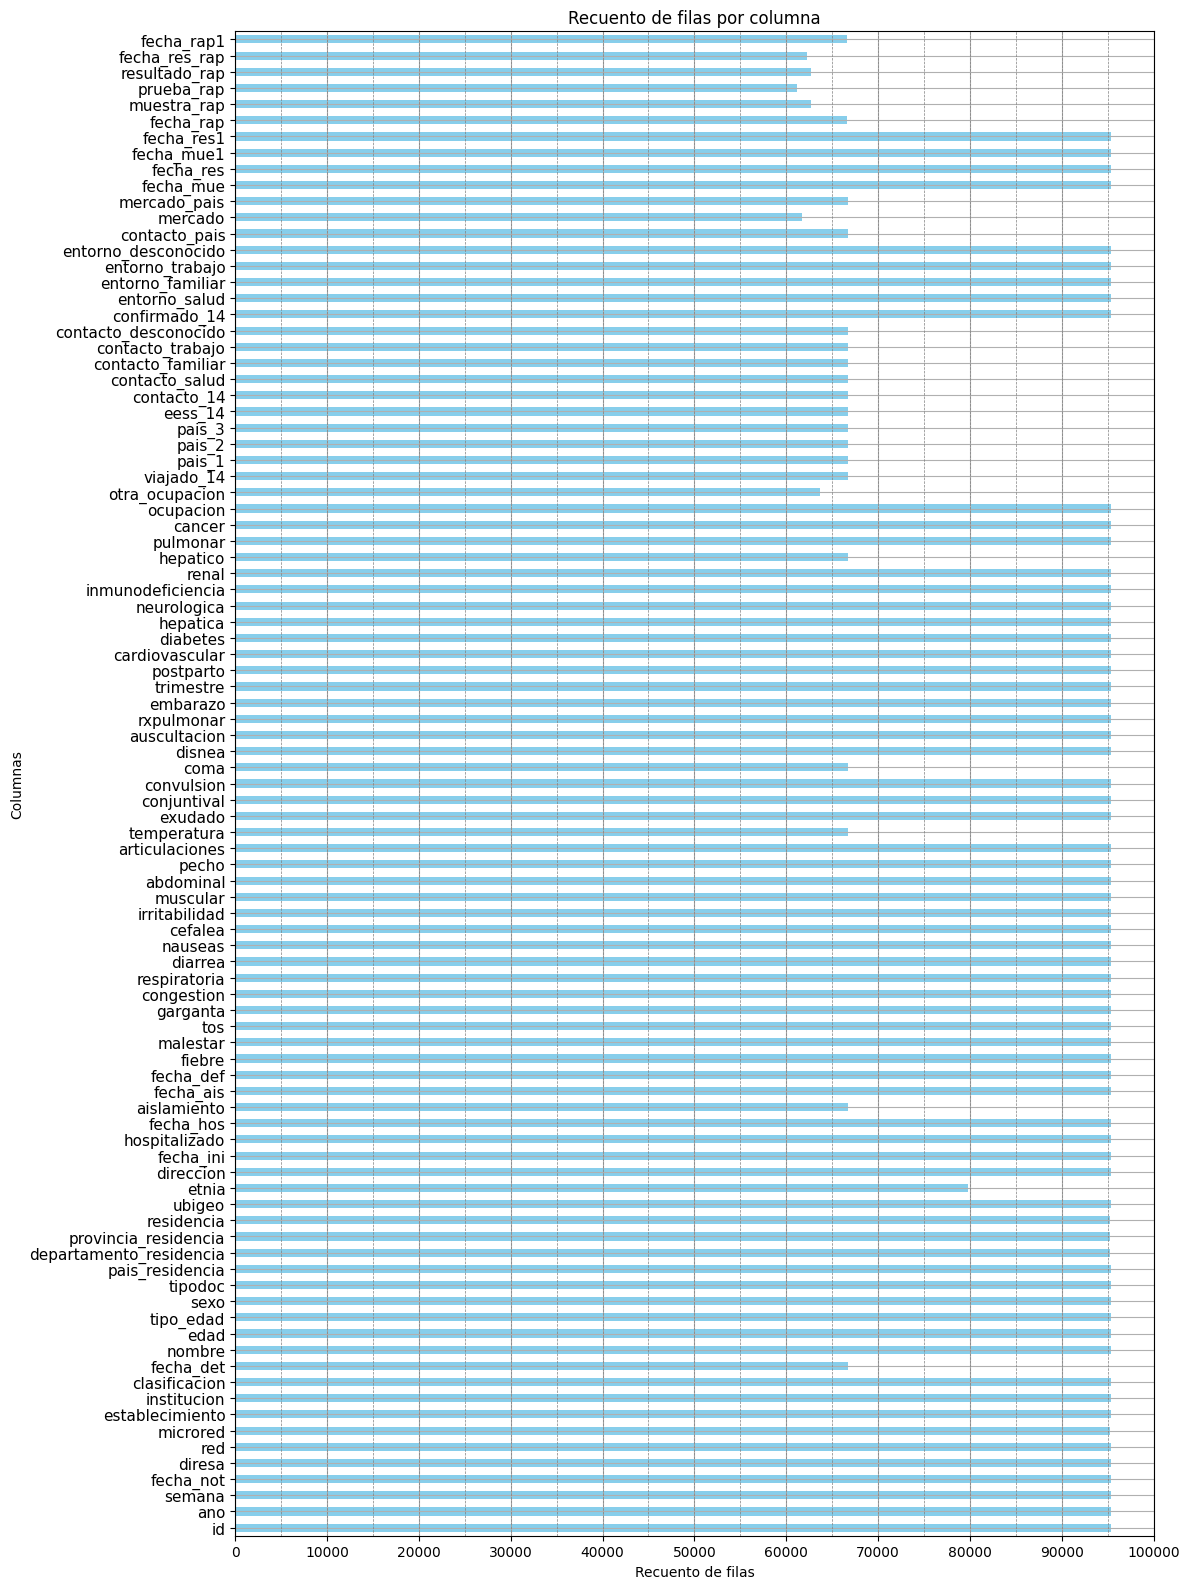

In [9]:
# Obtener el recuento de filas por columna
recuento_filas = df2.count()

# Crear el gráfico de barras
plt.figure(figsize=(12, 16))
recuento_filas.plot(kind='barh', color='skyblue')
plt.title('Recuento de filas por columna')
plt.ylabel('Columnas')
plt.xlabel('Recuento de filas')
plt.yticks(fontsize = 11)

# Especificar las marcas del eje x
plt.xticks(range(0, recuento_filas.max() + 10000, 10000))

# Agregar líneas entrecortadas en el eje x
for i in range(5000, recuento_filas.max(), 5000):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)

plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

## Completar valores faltantes

In [10]:
# Verificar qué columnas tienen al menos un NaN y contarlos
columnas_nan = df2.isna().any()  # Verifica qué columnas tienen al menos un NaN
columnas_nan = columnas_nan[columnas_nan].index  # Filtra solo columnas con NaN
columnas_con_nan = df2[columnas_nan].isna().sum()  # Cuenta los NaN en las columnas identificadas

# Valores únicos
valores_unicos = {}
for columna in columnas_nan:
    valores_unicos[columna] = len(df2[columna].unique())

# Valores no nulos
valores_no_nulos = {}
for columna in columnas_nan:
    valores_no_nulos[columna] = df2[columna].count()

# Tipos de datos
tipos_de_datos = {}
for columna in columnas_nan:
    tipos_de_datos[columna] = df2[columna].dtype

# Crear una tabla
tabla_nan = pd.DataFrame({
    "Columnas": columnas_con_nan.index,
    "Valores No Nulos": [valores_no_nulos[columna] for columna in columnas_con_nan.index],
    "Valores Nulos (NaN)": columnas_con_nan.values,
    "Valores únicos": [valores_unicos[columna] for columna in columnas_con_nan.index],
    "Tipo de datos": [tipos_de_datos[columna] for columna in columnas_con_nan.index]
})

tabla_nan

,Columnas,Valores No Nulos,Valores Nulos (NaN),Valores únicos,Tipo de datos
0,microred,95218,97,64,object
1,establecimiento,95298,17,345,object
2,institucion,95298,17,6,object
3,clasificacion,95311,4,5,object
4,fecha_det,66668,28647,220,object
5,departamento_residencia,95294,21,26,object
6,provincia_residencia,95294,21,102,object
7,residencia,95294,21,327,object
8,ubigeo,95298,17,335,object
9,etnia,79757,15558,6,object


In [11]:
df2[df2['microred'].isna()]

,id,ano,semana,fecha_not,diresa,red,microred,establecimiento,institucion,clasificacion,...,fecha_mue,fecha_res,fecha_mue1,fecha_res1,fecha_rap,muestra_rap,prueba_rap,resultado_rap,fecha_res_rap,fecha_rap1
5901,454875,2020,26,23-06-2020,PUNO,PUNO,NaN,HOSP.SANIDAD PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,CONFIRMADO,...,14-08-2020,14-08-2020,00-00-0000,00-00-0000,23-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,23-06-2020,13-08-2020
6976,533816,2020,25,30-06-2020,PUNO,PUNO,NaN,POLICLINICO PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,DESCARTADO,...,00-00-0000,00-00-0000,00-00-0000,00-00-0000,30-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,30-06-2020,00-00-0000
7001,534836,2020,27,30-06-2020,PUNO,PUNO,NaN,POLICLINICO PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,DESCARTADO,...,00-00-0000,00-00-0000,00-00-0000,00-00-0000,30-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,30-06-2020,00-00-0000
7053,536496,2020,27,30-06-2020,PUNO,PUNO,NaN,POLICLINICO PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,DESCARTADO,...,00-00-0000,00-00-0000,00-00-0000,00-00-0000,30-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,30-06-2020,00-00-0000
7057,536620,2020,27,30-06-2020,PUNO,PUNO,NaN,POLICLINICO PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,DESCARTADO,...,00-00-0000,00-00-0000,00-00-0000,00-00-0000,30-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,30-06-2020,00-00-0000
7071,537067,2020,27,30-06-2020,PUNO,PUNO,NaN,POLICLINICO PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,DESCARTADO,...,00-00-0000,00-00-0000,00-00-0000,00-00-0000,30-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,30-06-2020,00-00-0000
7085,537600,2020,27,30-06-2020,PUNO,PUNO,NaN,POLICLINICO PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,DESCARTADO,...,00-00-0000,00-00-0000,00-00-0000,00-00-0000,30-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,30-06-2020,00-00-0000
7100,538425,2020,27,30-06-2020,PUNO,PUNO,NaN,POLICLINICO PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,DESCARTADO,...,00-00-0000,00-00-0000,00-00-0000,00-00-0000,30-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,30-06-2020,00-00-0000
7103,538531,2020,26,30-06-2020,PUNO,PUNO,NaN,POLICLINICO PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,DESCARTADO,...,00-00-0000,00-00-0000,00-00-0000,00-00-0000,30-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,30-06-2020,00-00-0000
7107,538634,2020,26,30-06-2020,PUNO,PUNO,NaN,POLICLINICO PNP,SANIDAD DE LA POLICIA NACIONAL DEL PERU,DESCARTADO,...,00-00-0000,00-00-0000,00-00-0000,00-00-0000,30-06-2020,MUESTRA DE SANGRE,SEROLOGICA,NEGATIVO,30-06-2020,00-00-0000


In [12]:
print(df2['microred'].unique())

['SIN MICRORED' 'METROPOLITANO' 'JOSÉ ANTONIO ENCINAS' 'CABANILLA'
 'DESAGUADERO' 'ZEPITA' 'ÁCORA' 'TARACO' 'SIMÓN BOLIVAR' 'ORURILLO'
 'NUÑOA' 'HUANCANÉ' 'AYAPATA' 'SANTA ADRIANA' 'CAPACHICA' 'POMATA'
 'JULIACA' 'COJATA' 'ARAPA' 'SAN ANTÓN' 'ILAVE' 'MAÑAZO'
 'JOSÉ DOMINGO CHOQUEHUANCA' 'ASILLO' 'COPANI' 'OLLARAYA' 'YUNGUYO'
 'SAN PEDRO DE PUTINA PUNCO' 'MOLINO' 'ALIANZA' 'CONO SUR' 'CHUPA'
 'MUÑANI' 'SANTA LUCÍA' 'LARAQUERI' 'SAN GABÁN' 'AJOYANI' 'MASIAPO'
 'CRUCERO' 'MOHO' 'PUTINA' 'AYAVIRI' 'PILCUYO' 'PALCA' 'SAMÁN' 'MAZOCRUZ'
 'CABANILLAS' 'ANANEA' 'CHECCA' nan 'SAN JUAN DEL ORO' 'ISIVILLA' 'PHARA'
 'LAMPA' 'COASA' 'SANTA ROSA' 'CONIMA' 'LLALLI' 'VILQUECHICO' 'CAMICHACHI'
 'ROSASPATA' 'CUYO CUYO' 'SANDIA' 'AYCHUYO']


### Valores Numéricos

In [13]:
valores_numericos = ['temperatura', 'coma', 'hepatico', 'contacto_salud', 'contacto_familiar', 'contacto_trabajo', 'contacto_desconocido']

In [14]:
df3 = df2.copy()
for columna in valores_numericos:
    mediana = df3[columna].median()
    print(columna, "=", mediana)
    df3[columna] = df3[columna].fillna(mediana)

temperatura = 36.0
coma = 0.0
hepatico = 0.0
contacto_salud = 0.0
contacto_familiar = 0.0
contacto_trabajo = 0.0
contacto_desconocido = 0.0


### Valores Categóricos

In [15]:
dicc_valores_categorico = {
    'microred' : 'SIN MICRORED',
    'establecimiento' : 'SIN REGISTRO',
    'institucion' : 'SIN REGISTRO',
    'clasificacion' : 'SIN REGISTRO',
    'fecha_det' : '00-00-0000',
    'departamento_residencia' : 'SIN REGISTRO',
    'provincia_residencia' : 'SIN REGISTRO',
    'residencia' : 'SIN REGISTRO',
    'ubigeo' : 'SIN REGISTRO',
    'etnia' : 'Otro',
    'aislamiento' : 'DESCONOCIDO',
    'otra_ocupacion' : 'SIN SEGUNDA OCUPACION',
    'viajado_14' : 'DESCONOCIDO',
    'pais_1' : 'Sin registro',
    'pais_2' : 'Sin registro',
    'pais_3' : 'Sin registro',
    'eess_14' : 'DESCONOCIDO',
    'contacto_14' : 'DESCONOCIDO',
    'contacto_pais' : 'Sin registro',
    'mercado' : 'DESCONOCIDO',
    'mercado_pais' : 'Sin registro',
    'fecha_mue1' : '00-00-0000',
    'fecha_res1' : '00-00-0000',
    'fecha_rap' : '00-00-0000',
    'muestra_rap' : 'DESCONOCIDO',
    'prueba_rap' : 'DESCONOCIDO',
    'resultado_rap' : 'DESCONOCIDO',
    'fecha_res_rap' : '00-00-0000',
    'fecha_rap1' : '00-00-0000'
}

In [16]:
for x, y in dicc_valores_categorico.items():
    df3[x] = df3[x].fillna(y)

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95315 entries, 0 to 95314
Data columns (total 93 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       95315 non-null  int64  
 1   ano                      95315 non-null  int64  
 2   semana                   95315 non-null  int64  
 3   fecha_not                95315 non-null  object 
 4   diresa                   95315 non-null  object 
 5   red                      95315 non-null  object 
 6   microred                 95315 non-null  object 
 7   establecimiento          95315 non-null  object 
 8   institucion              95315 non-null  object 
 9   clasificacion            95315 non-null  object 
 10  fecha_det                95315 non-null  object 
 11  nombre                   95315 non-null  object 
 12  edad                     95315 non-null  int64  
 13  tipo_edad                95315 non-null  object 
 14  sexo                  

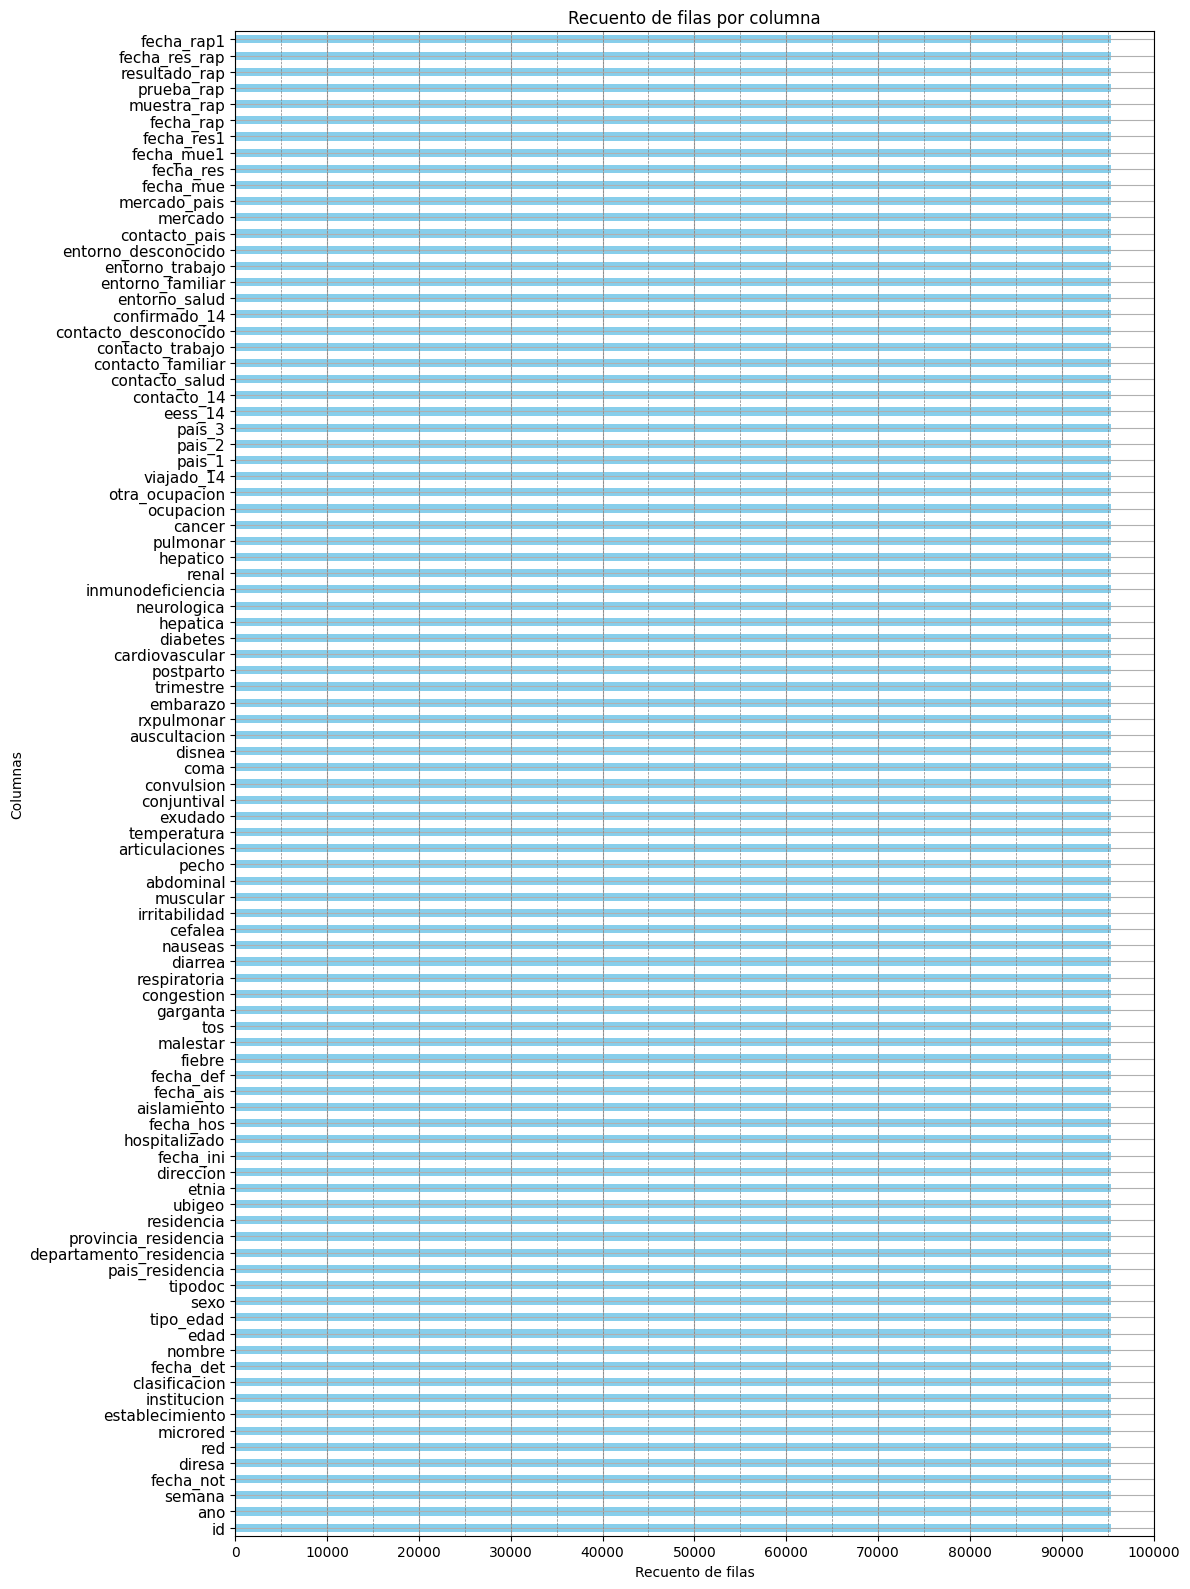

In [18]:
# Obtener el recuento de filas por columna
recuento_filas = df3.count()

# Crear el gráfico de barras
plt.figure(figsize=(12, 16))
recuento_filas.plot(kind='barh', color='skyblue')
plt.title('Recuento de filas por columna')
plt.ylabel('Columnas')
plt.xlabel('Recuento de filas')
plt.yticks(fontsize = 11)

# Especificar las marcas del eje x
plt.xticks(range(0, recuento_filas.max() + 10000, 10000))

# Agregar líneas entrecortadas en el eje x
for i in range(5000, recuento_filas.max(), 5000):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)

plt.grid(True)
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

### Valores secundarios 

In [19]:
df4 = df3.copy()

In [20]:
# Calcular la edad en grupos (por ejemplo, niños, adultos, ancianos)
bins = [0, 5, 12, 18, 28, 65, float('inf')]
labels = ['Primera infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Vejez']
df4['grupo_etario'] = pd.cut(df4['edad'], bins=bins, labels=labels, right=False)

# Analizar la frecuencia de síntomas
sintomas = ['fiebre', 'tos', 'malestar', 'garganta', 'congestion', 'respiratoria', 'diarrea', 'cefalea', 'irritabilidad', 'muscular', 'abdominal', 'pecho', 'articulaciones']
df4['total_sintomas'] = df4[sintomas].sum(axis=1)

# Determinar si el paciente tiene al menos un síntoma reportado
df4['tiene_sintomas'] = df4[sintomas].any(axis=1)

# Calcular la cantidad de contactos totales (sumando todos los tipos de contactos)
tipos_contacto = ['contacto_salud', 'contacto_familiar', 'contacto_trabajo', 'contacto_desconocido']
df4['total_contactos'] = df4[tipos_contacto].sum(axis=1)

# Determinar si el paciente ha estado en contacto con alguien que ha viajado recientemente
df4['contacto_viaje'] = df4['contacto_pais'].notnull()

# Determinar si el paciente tiene al menos un síntoma grave (como fiebre alta o dificultad para respirar)
df4['sintoma_grave'] = (df4['fiebre'] == 'Alta') | (df4['disnea'] == 'SI')


# Mostrar las primeras filas del DataFrame con los nuevos datos derivados
df4.head()

,id,ano,semana,fecha_not,diresa,red,microred,establecimiento,institucion,clasificacion,...,prueba_rap,resultado_rap,fecha_res_rap,fecha_rap1,grupo_etario,total_sintomas,tiene_sintomas,total_contactos,contacto_viaje,sintoma_grave
0,542,2021,5,09-02-2021,PUNO,PUNO,SIN MICRORED,"HOSP. REG. ""MANUEL NUÑEZ BUTRÓN"" - PUNO",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,2,True,0.0,True,False
1,1234,2020,10,07-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,7,True,0.0,True,False
2,1258,2020,10,09-03-2020,PUNO,PUNO,SIN MICRORED,HOSPITAL III DE ESSALUD,ESSALUD,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,2,True,0.0,True,False
3,1266,2020,10,09-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Vejez,5,True,0.0,True,False
4,1292,2021,9,05-03-2021,PUNO,PUNO,METROPOLITANO,C.S. METROPOLITANO PUNO,GOBIERNO REGIONAL,CONFIRMADO,...,SEROLOGIA,NEGATIVO,16-07-2020,00-00-0000,Adultez,4,True,0.0,True,False


In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95315 entries, 0 to 95314
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       95315 non-null  int64   
 1   ano                      95315 non-null  int64   
 2   semana                   95315 non-null  int64   
 3   fecha_not                95315 non-null  object  
 4   diresa                   95315 non-null  object  
 5   red                      95315 non-null  object  
 6   microred                 95315 non-null  object  
 7   establecimiento          95315 non-null  object  
 8   institucion              95315 non-null  object  
 9   clasificacion            95315 non-null  object  
 10  fecha_det                95315 non-null  object  
 11  nombre                   95315 non-null  object  
 12  edad                     95315 non-null  int64   
 13  tipo_edad                95315 non-null  object  
 14  sexo  

## Exportar datos

In [21]:
# Guardar el DataFrame codificado en un nuevo archivo CSV (opcional)
df4.to_csv('data/datos-covid-limpios.csv', index=False)
